In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
melb_data = pd.read_csv("melb_data.csv")
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
# identifying numerical columns
num_cols = list(melb_data.dtypes[melb_data.dtypes != 'object'].index)
print(num_cols)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [5]:
# missing values in the numerical columns
melb_data[num_cols].isna().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [6]:
# imputing them with the mean values (null values will raise error while using the feature selection techniques)
melb_data[num_cols] = melb_data[num_cols].fillna(melb_data[num_cols].mean())
melb_data[num_cols].isna().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [7]:
# identifying the categorical columns
cat_cols = list(melb_data.dtypes[melb_data.dtypes == 'object'].index)
print(cat_cols)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [8]:
# missing values in the categorical columns
melb_data[cat_cols].isna().sum()

Suburb            0
Address           0
Type              0
Method            0
SellerG           0
Date              0
CouncilArea    1369
Regionname        0
dtype: int64

In [9]:
# imputing them with the mode values (null values will raise error while using the feature selection techniques)
melb_data[cat_cols] = melb_data[cat_cols].fillna(melb_data[cat_cols].mode().iloc[0])
melb_data[cat_cols].isna().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    0
Regionname     0
dtype: int64

In [10]:
# ordinal encoding (required for feature selection techniques)
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
melb_data = melb_data.copy()
melb_data[cat_cols] = encoder.fit_transform(melb_data[cat_cols])
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0.0,12794.0,2,0.0,1480000.0,1.0,23.0,45.0,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,31.0,-37.79960,144.99840,2.0,4019.0
1,0.0,5943.0,2,0.0,1035000.0,1.0,23.0,47.0,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,31.0,-37.80790,144.99340,2.0,4019.0
2,0.0,9814.0,3,0.0,1465000.0,3.0,23.0,48.0,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,31.0,-37.80930,144.99440,2.0,4019.0
3,0.0,9004.0,3,0.0,850000.0,0.0,23.0,48.0,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,31.0,-37.79690,144.99690,2.0,4019.0
4,0.0,10589.0,4,0.0,1600000.0,4.0,155.0,49.0,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,31.0,-37.80720,144.99410,2.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,302.0,1991.0,4,0.0,1245000.0,1.0,16.0,33.0,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,23.0,-37.90562,145.16761,4.0,7392.0
13576,305.0,12234.0,3,0.0,1031000.0,3.0,251.0,33.0,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,23.0,-37.85927,144.87904,6.0,6380.0
13577,305.0,12745.0,3,0.0,1170000.0,1.0,194.0,33.0,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,23.0,-37.85274,144.88738,6.0,6380.0
13578,305.0,13311.0,4,0.0,2500000.0,0.0,222.0,33.0,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,23.0,-37.85908,144.89299,6.0,6380.0


## Correlation

<AxesSubplot:>

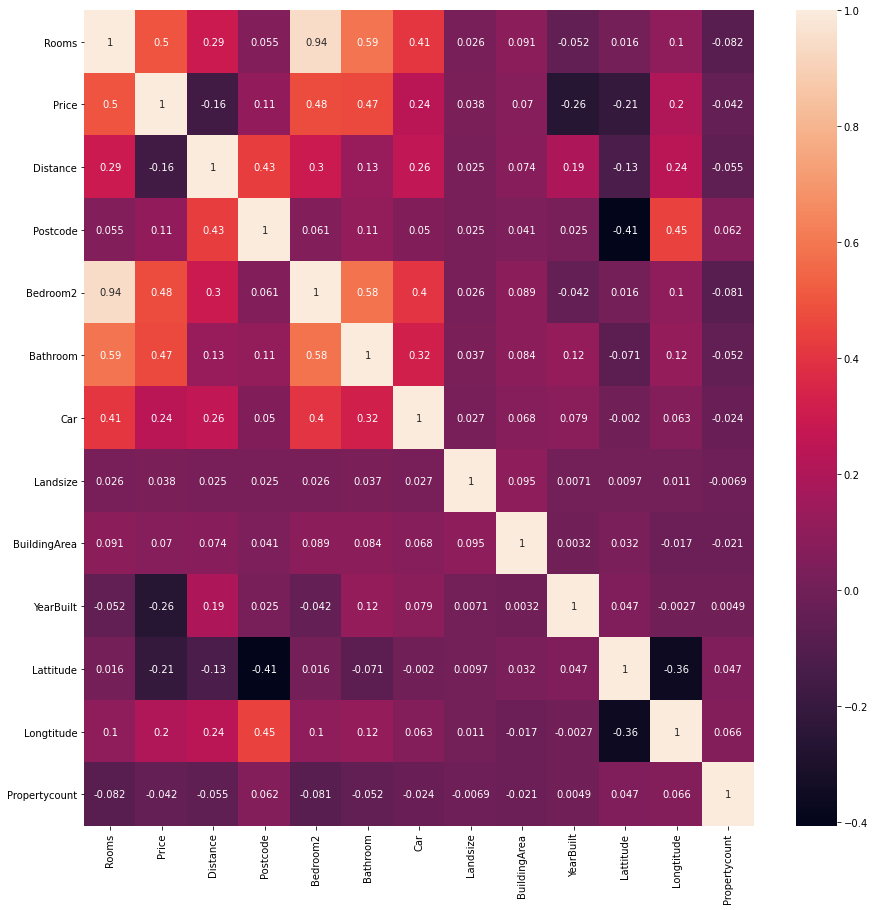

In [11]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(melb_data[num_cols].corr(), annot=True)

<AxesSubplot:>

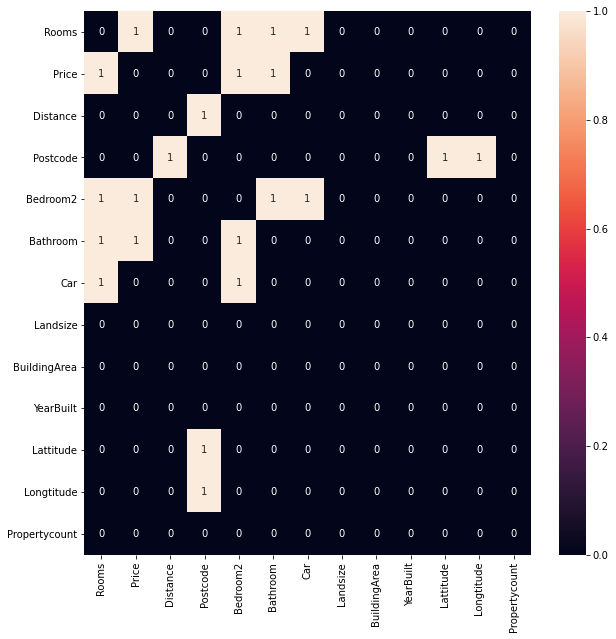

In [12]:
# To identify the highly correlated (absolute value > 0.4 pairs) conveniently
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap((np.abs(melb_data[num_cols].corr()) > 0.4) & (melb_data[num_cols].corr() != 1), annot=True)

The following pairs have (absolute) correlation > 0.4 (avoiding the Price column, since this will be our target column, and can't be removed.)
* Rooms, Bedroom2
* Rooms, Bathroom
* Rooms, Car
* Distance, Postcode
* Postcode, Lattitude
* Postcode, Longtitude
* Bedroom2, Bathroom
* Bedroom2, Car
* Landsize, BuildingArea

Among the following statistically & logically related feature groups, 
* Rooms, Bedroom2, Bathroom --> Choose Rooms
* Distance, Postcode (, Lattitude, Longtitude) --> Choose Distance
* Landsize, BuildingArea --> Choose Landsize

In [13]:
corr_drop_list = ['Bedroom2', 'Bathroom', 'Postcode', 'Lattitude', 'Longtitude', 'BuildingArea']
corr_melb_data = melb_data.drop(corr_drop_list, axis=1)
corr_melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,0.0,12794.0,2,0.0,1480000.0,1.0,23.0,45.0,2.5,1.0,202.0,1964.684217,31.0,2.0,4019.0
1,0.0,5943.0,2,0.0,1035000.0,1.0,23.0,47.0,2.5,0.0,156.0,1900.000000,31.0,2.0,4019.0
2,0.0,9814.0,3,0.0,1465000.0,3.0,23.0,48.0,2.5,0.0,134.0,1900.000000,31.0,2.0,4019.0
3,0.0,9004.0,3,0.0,850000.0,0.0,23.0,48.0,2.5,1.0,94.0,1964.684217,31.0,2.0,4019.0
4,0.0,10589.0,4,0.0,1600000.0,4.0,155.0,49.0,2.5,2.0,120.0,2014.000000,31.0,2.0,4019.0


## Chi-square

In [14]:
from sklearn.feature_selection import chi2, SelectKBest

In [15]:
(melb_data[num_cols]<0).any(axis=0)

Rooms            False
Price            False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
Lattitude         True
Longtitude       False
Propertycount    False
dtype: bool

In [16]:
# scaling the Lattitude column to remove negative values (raises error in chi2 selection)
from sklearn.preprocessing import MinMaxScaler
melb_data['Lattitude'] = MinMaxScaler().fit_transform(np.array(melb_data.Lattitude).reshape(-1,1))
(melb_data[num_cols]<0).any(axis=0)

Rooms            False
Price            False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

In [17]:
# selection among the numerical columns alone
chi2_selector = SelectKBest(score_func=chi2, k='all')
X = melb_data[num_cols].drop('Price', axis=1)
chi2_data = chi2_selector.fit_transform(X, melb_data.Price)
for i in range(len(X.columns)):
    print(f"{melb_data[num_cols].drop('Price', axis=1).columns[i]}: {chi2_selector.scores_[i]}")

Rooms: 1839.2552913573786
Distance: 8997.199124944656
Postcode: 6973.141307428992
Bedroom2: 1776.2486698025589
Bathroom: 1535.3204904498764
Car: 1726.0815029672874
Landsize: 38379656.38854402
BuildingArea: 1472618.8744421068
YearBuilt: 1412.734254530469
Lattitude: 60.783071726530565
Longtitude: 0.22241941713033497
Propertycount: 5533700.8327184385


In [18]:
# just to observe
# selection based on the entire set of features
chi2_selector_c = SelectKBest(score_func=chi2, k=12)
chi2_data_c = chi2_selector_c.fit_transform(melb_data.drop('Price', axis=1), melb_data.Price)

mask = chi2_selector_c.get_support()
new_features = melb_data.drop('Price', axis=1).columns[mask]
print(new_features)

Index(['Suburb', 'Address', 'Type', 'SellerG', 'Date', 'Distance', 'Postcode',
       'Landsize', 'BuildingArea', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')


## Mutual Information

In [19]:
from sklearn.feature_selection import mutual_info_regression

In [20]:
mutual_info_scores = mutual_info_regression(melb_data[num_cols].drop('Price', axis=1), melb_data.Price)
mutual_info_scores

array([0.21341301, 0.20584998, 0.31588432, 0.21058959, 0.12789147,
       0.0954752 , 0.14474956, 0.19842725, 0.10356368, 0.14824809,
       0.15417277, 0.20432801])

In [21]:
# selection among the numerical columns alone
mutual_info_selector = SelectKBest(score_func=mutual_info_regression, k='all')
X = melb_data[num_cols].drop('Price', axis=1)
mutual_info_data = mutual_info_selector.fit_transform(X, melb_data.Price)
for i in range(len(X.columns)):
    print(f"{melb_data[num_cols].drop('Price', axis=1).columns[i]}: {mutual_info_selector.scores_[i]}")

Rooms: 0.21706382761558363
Distance: 0.20724909267992686
Postcode: 0.3185736862486346
Bedroom2: 0.20265939039563818
Bathroom: 0.13279180615082753
Car: 0.08908623020730433
Landsize: 0.14410964749230049
BuildingArea: 0.19677405570402273
YearBuilt: 0.10061586819420754
Lattitude: 0.14777919165873232
Longtitude: 0.15304381912232845
Propertycount: 0.2039655618197278


In [22]:
# just to observe
# selection based on the entire set of features
mutual_info_selector_c = SelectKBest(score_func=mutual_info_regression, k=12)
mutual_info_data_c = mutual_info_selector_c.fit_transform(melb_data.drop('Price', axis=1), melb_data.Price)

mask = mutual_info_selector_c.get_support()
new_features = melb_data.drop('Price', axis=1).columns[mask]
print(new_features)

Index(['Suburb', 'Rooms', 'Type', 'Distance', 'Postcode', 'Bedroom2',
       'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


## Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# selection among the numerical columns alone
clf = RandomForestRegressor(n_estimators=20, random_state=17)
rf = clf.fit(melb_data[num_cols].drop('Price', axis=1), melb_data.Price)
rf_feat_importances = rf.feature_importances_

## Visualising the Feature Importances

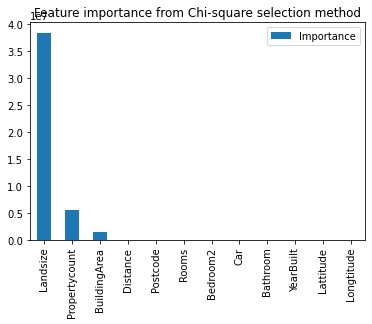

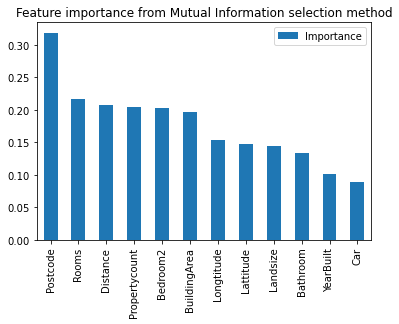

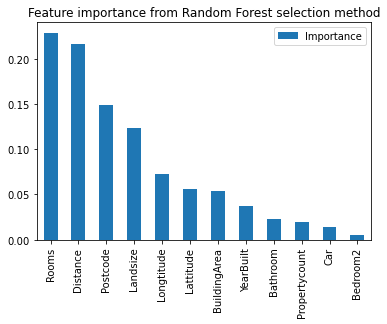

In [25]:
def graph_importances(method_name, importances):
    feat_importances = pd.DataFrame(importances, index=melb_data[num_cols].drop('Price', axis=1).columns, columns=["Importance"])
    feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
    feat_importances.plot(kind='bar')
    plt.title(f"Feature importance from {method_name} selection method")
    plt.show()
    
graph_importances("Chi-square", chi2_selector.scores_)
graph_importances("Mutual Information", mutual_info_selector.scores_)
graph_importances("Random Forest", rf_feat_importances)


## Inference

Considering only the numerical features (top/max 8), 
* Correlation chose: 'Rooms', 'Distance', 'Car', 'Landsize', 'YearBuilt', 'Propertycount'
* Chi-square chose: 'Landsize', 'Propertycount', 'BuildingArea' [, 'Distance', 'Postcode', 'Rooms', 'Bedroom2']
* Mutual-Information chose: 'Postcode', 'Rooms', 'Bedroom2', 'Distance', 'Propertycount', 'BuildingArea', 'Longtitude', 'Lattitude'
* Random Forest chose: 'Rooms', 'Distance', 'Postcode', 'Landsize', 'Longtitude', 'BuildingArea', 'YearBuilt', 'Bathroom'


The use of Lattitude, Longitude & Postcode together will be redundant but since from domain knowledge, we will remove Latitude and Longitude and hence the selectors won't have them as input. Also, some amount of redundancy occurs when Rooms & Bedroom2 are used together. Hence this mutual-information selector did not perform well here. 

The chi-square selection didn't give much importance to all but the top three features.

The random forest (even with only 20 estimators) resulted in better feature selection & importance order. Hence the RF, paired with correlation analysis and domain knowledge intuition seems to be the best option here.
